In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [12]:
# Import data
df_train = pd.read_csv('Documents/data/train_v2.csv')
df_test = pd.read_csv('Documents/data/test_v2.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Store target variable of training data in a safe place
loss_train_ = df_train.loss
loss_test_ = pd.read_csv('Documents/data/sampleSubmission.csv')

In [27]:
# 合并target

loss_test=loss_test_.drop(columns=['id'])
target = pd.concat([loss_train,loss_test])
print(target.shape)
type(target)

(316415, 1)


pandas.core.frame.DataFrame

In [18]:
#合并train and test

data = pd.concat([df_train.drop(['loss'], axis=1), df_test])
#删掉 'id'列
df_data = data.drop(columns=['id'])
#查看
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316415 entries, 0 to 210943
Columns: 769 entries, f1 to f778
dtypes: float64(655), int64(95), object(19)
memory usage: 1.8+ GB


In [19]:
# View head of 'Name' column
df_data.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
210939,140,9,0.802220,3600,10.0,9836,831.0,491.0,128.28,138.80,...,-12.54,3,6.22,-4.55,7.01,0.2130,-0.7890,0,1,13
210940,154,9,0.477440,3600,3.0,80502,4283.0,280.0,154.13,153.84,...,-9.64,20,5.98,-4.13,3.02,0.2582,0.4792,1,1,41
210941,150,8,0.480407,4400,7.0,14507,78.0,1502.0,150.75,150.20,...,-1.12,4,0.41,-0.16,0.08,0.1552,0.8375,1,1,20
210942,135,8,0.223248,2700,16.0,13700,9572.0,5151.0,131.42,134.49,...,-29.81,51,20.39,-15.14,11.75,0.2411,0.7004,0,0,513
210943,166,7,0.870420,5300,4.0,81409,1584.0,2823.0,161.68,164.88,...,-7.02,10,5.83,-4.96,4.30,0.3003,1.1379,0,1,1212


In [44]:
target['loss'] = target['loss'].astype(str)


In [ ]:
#定义函数将loss转变成二分类变量,loss>0为违约用户，值为1
# transform the loss to the binary form
def toLabels(y):
    labels = np.zeros(len(y))
    labels[y>0] = 1
    return labels

In [ ]:
#将loss转变成二分类变量,loss>0为违约用户，值为1
# transform the loss to the binary form
def toLabels(y):
    labels = np.zeros(len(y))
    labels[target>0] = 1
    return labels

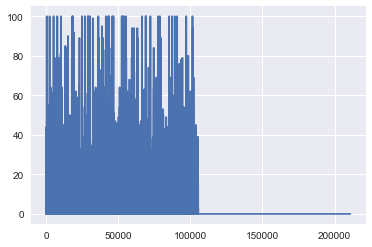

In [25]:
#处理缺失值,把NA默认为缺失值
#df_data.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, target, random_state=0)

#特征选择
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())